In [1]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List
import matplotlib.cm as cm

# Import functions from Part I 

In [5]:
#Import functions to calculate ε-simplications from Task 2

def TS_greedy(T: List[Tuple[float, float]], eps: float) -> List[Tuple[float, float]]:
    if len(T) < 3:
        return T
    else:
        T_star = [T[0], T[-1]]
        dmax = 0
        index = 0
        for i in range(1, len(T) - 1):
            dis = d(T[i], T_star)
            if dis > dmax:
                index = i 
                dmax = dis
        if dmax <= eps: 
            return T_star 
        else:
            return TS_greedy(T[0:index], eps) + TS_greedy(T[index:], eps) 
        
def d(q: Tuple[float, float], e: List[Tuple[float, float]]) -> float:
    # Let the start point of e be a, and end point be b 
    a, b = e
    dot_product = (q[0] - a[0]) * (b[0] - a[0]) + (q[1] - a[1]) * (b[1] - a[1])
    ab_length_sq = (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2
    projection = dot_product / ab_length_sq
    if projection <= 0:
        return ((q[0] - a[0]) ** 2 + (q[1] - a[1]) ** 2) ** 0.5
    elif projection >= 1:
        return ((q[0] - b[0]) ** 2 + (q[1] - b[1]) ** 2) ** 0.5
    else:
        closest_x = a[0] + projection * (b[0] - a[0])
        closest_y = a[1] + projection * (b[1] - a[1])
        return ((q[0] - closest_x) ** 2 + (q[1] - closest_y) ** 2) ** 0.5

In [8]:
def dist(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

def dtw(seriesA, seriesB):
    m, n = len(seriesA) + 1, len(seriesB) + 1
    dp = [[[float('inf'), set()] for _ in range(n)] for _ in range(m)]
    dp[0][0] = [0, None]

    for i in range(m - 1):
        for j in range(n - 1):
            curr = dp[i][j]
            curr[0] += dist(seriesA[i], seriesB[j]) ** 2
            if curr[0] < dp[i + 1][j][0]: dp[i + 1][j] = [curr[0], (i, j)]
            if curr[0] < dp[i][j + 1][0]: dp[i][j + 1] = [curr[0], (i, j)]
            if curr[0] < dp[i + 1][j + 1][0]: dp[i + 1][j + 1] = [curr[0], (i, j)]
    
    total_cost, last = dp[len(seriesA) - 1][len(seriesB) - 1]
    
    path = {(len(seriesA) - 1, len(seriesB) - 1)}
    while last is not None:
        path.add(last)
        last = dp[last[0]][last[1]][1]

    return (total_cost / len(path))**0.5, path

# Import Data

In [ ]:
df = pd.read_csv('/geolife-cars-upd8.csv')
# df = pd.read_csv('geolife-cars-upd8.csv')

In [12]:
#List of trajectories to center
t_list = {'115-20080527225031', '115-20080528230807', 
          '115-20080618225237', '115-20080624022857', 
          '115-20080626014331', '115-20080626224815',
          '115-20080701030733', '115-20080701225507',
          '115-20080702225600', '115-20080706230401', 
          '115-20080707230001'}

t_names = list(t_list)

#Sets of all 11 trajectories
task4_set = []
e_003_set = []
e_03_set = []
e_01_set = []

for t_id in t_list:
    trajec = df[df["id_" ] == t_id]
    t = list(zip(trajec.x, trajec.y))
    task4_set.append(t)
    e_003_set.append(TS_greedy(t, 0.03))
    e_03_set.append(TS_greedy(t, 0.3))
    e_01_set.append(TS_greedy(t, 0.1))


## Approach 1 Calculation

In [15]:
#Parameter: a list of trajectories; type = List[List[Tuple[float, float]]]
#Return: center trajectory, average distance, min total distance
def center_I(trajectories):
    arr = [[0 for _ in range(len(trajectories))] for _ in range(len(trajectories))]
    minimum_total = float('inf')
    center_index = 0
    for i in range(len(trajectories)):
        for j in range(len(trajectories)):
            if arr[j][i] != 0: 
                arr[i][j] = arr[j][i]
            else: 
                arr[i][j] = dtw(trajectories[i], trajectories[j])[0]
            
    for i in range(len(trajectories)):
        temp = sum(arr[i])
        if temp <= minimum_total: 
            minimum_total = temp
            center_index = i
    return trajectories[center_index], center_index

In [25]:
# obtain avg distance of each original trajectory from the center trajectory
def avg_dist_from_center(trajectories, center_trajectory):
    total_dist = 0
    for i in range(len(trajectories)):
        total_dist += dtw(trajectories[i], center_trajectory)[0]
    return total_dist / len(trajectories)

In [26]:
#Checking every set
print("No simplification")
approach_1, center_index = center_I(task4_set)
avg_dis = avg_dist_from_center(task4_set, task4_set[center_index])
print("Average distance & the index of center trajectory:")
print(avg_dis, center_index)
print('\n')

print("e = 0.03")
approach_11, center_index1 = center_I(e_003_set)
avg_dis1 = avg_dist_from_center(task4_set, e_003_set[center_index1])
print("Average distance & the index of center trajectory:")
print(avg_dis1, center_index1)
print('\n')

print("e = 0.1")
approach_13, center_index3 = center_I(e_01_set)
avg_dis3 = avg_dist_from_center(task4_set, e_01_set[center_index3])
print("Average distance & the index of center trajectory:")
print(avg_dis3, center_index3)
print('\n')

print("e = 0.3")
approach_12, center_index2 = center_I(e_03_set)
avg_dis2 = avg_dist_from_center(task4_set, e_03_set[center_index2])
print("Average distance & the index of center trajectory:")
print(avg_dis2, center_index2)

No simplification
Average distance & the index of center trajectory:
0.07570009184036672 6


e = 0.03
Average distance & the index of center trajectory:
1.4632758138905322 7


e = 0.1
Average distance & the index of center trajectory:
1.693969960109532 6
e = 0.3
Average distance & the index of center trajectory:
2.14771317825795 6




## Approach 2 Calculations: Preprocessing

In [20]:
#print((task4_set[7]))

preprocessed = task4_set.copy()

for trajec in preprocessed:
    for points in trajec:
        if points[0] >= 15.5:
            trajec.remove(points)
    
#print(preprocessed[7])

In [21]:
def compute_average_trajectory(trajectories):
    interpolated_trajectories = trajectories
    num_points = len(interpolated_trajectories[0])
    avg_trajectory = []

    for i in range(num_points-1):
        total_x = 0.0
        total_y = 0.0
        for trajectory in interpolated_trajectories:
            total_x += trajectory[i][0]
            total_y += trajectory[i][1]
        avg_x = total_x / len(interpolated_trajectories)
        avg_y = total_y / len(interpolated_trajectories)
        avg_trajectory.append((avg_x, avg_y))

    return avg_trajectory

def interpolate(trajectories, num_points):
    interpolated_trajectories = []
    for trajectory in trajectories:
        x = [point[0] for point in trajectory]
        y = [point[1] for point in trajectory]
        total_distance = 0.0
        distances = [0.0]

        # Compute distances between consecutive points
        for i in range(1, len(x)):
            distance = ((x[i] - x[i - 1]) ** 2 + (y[i] - y[i - 1]) ** 2) ** 0.5
            total_distance += distance
            distances.append(total_distance)

        # Compute spacing between equidistant points
        spacing = total_distance / (num_points + 1)

        # Compute parameter values (x-values) for interpolation
        parameter_values = [i * spacing for i in range(1, num_points + 1)]

        # Interpolate y-values using parameter values
        interpolated_y = []
        interpolated_x = []
        current_point = 0
        for parameter in parameter_values:
            while distances[current_point] < parameter:
                current_point += 1

            # Perform linear interpolation between consecutive points
            x1, y1 = x[current_point - 1], y[current_point - 1]
            x2, y2 = x[current_point], y[current_point]
            segment_length = distances[current_point] - distances[current_point - 1]
            t = (parameter - distances[current_point - 1]) / segment_length
            interpolated_x.append(x1 + (x2 - x1) * t)
            interpolated_y.append(y1 + (y2 - y1) * t)

        interpolated_trajectory = list(zip(interpolated_x, interpolated_y))
        interpolated_trajectories.append(interpolated_trajectory)

    return interpolated_trajectories

In [22]:
def approach_II(trajectories):
    total_points = 0
    for trajectory in trajectories:
        total_points += len(trajectory)
    num_points = int(total_points / len(trajectories))
    
    interpolated_trajectories = interpolate(trajectories, num_points)
    avg_trajectory = compute_average_trajectory(interpolated_trajectories)
    return avg_trajectory, num_points, interpolated_trajectories

In [23]:
center_2, num_inter_pts, interpolated_set = approach_II(preprocessed)

In [27]:
# compute avg dist from center trajectory with approach 2
avg_dis_approach2 = avg_dist_from_center(task4_set, center_2)
print("Average distance & the index of center trajectory:")
print(avg_dis_approach2)
print('\n')

Average distance & the index of center trajectory:
0.11525783306146144




## Approach 1 Visualizations
- We want three sets of simplifications and their centers. 
- We want original set with center

<ipython-input-33-dacf13d3d944>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(task4_set))


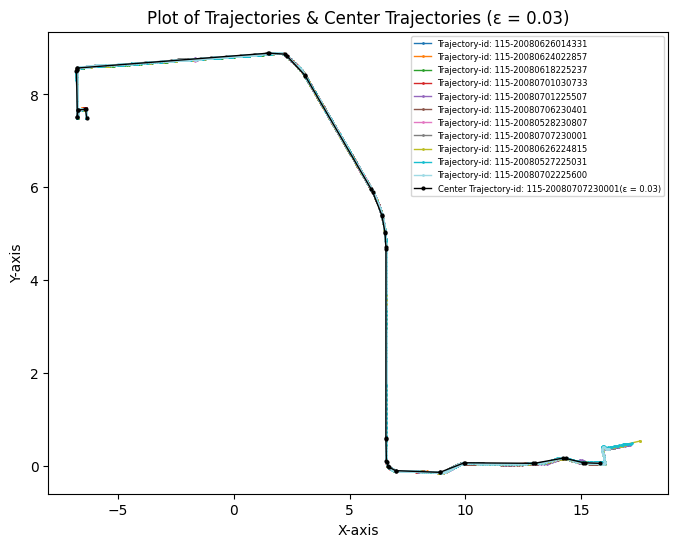

In [33]:
#e-003
cmap = cm.get_cmap('tab20', len(task4_set))
#avg_dis, approach_1, center_index = center_I(task4_set)

fig, ax = plt.subplots(figsize=(8,6))
counter = 0
for points in task4_set:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.plot(x, y, color=cmap(counter), label='Trajectory-id: ' + t_names[counter], linestyle='-', marker='o',
           markersize=1, lw = 1)
    counter = counter +1

center_points = e_003_set[ center_index1 ]
cx = [point[0] for point in center_points]
cy = [point[1] for point in center_points]
ax.plot(cx, cy, c='black', label='Center Trajectory-id: '+ t_names[ center_index1 ]+'(ε = 0.03)', linestyle='-', marker='o',
           markersize=2, lw = 1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories & Center Trajectories (ε = 0.03)')
ax.legend(fontsize = 6)
plt.savefig('task4e003.png', dpi = 300)
plt.show()

<ipython-input-35-62a1bb03bcf2>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(task4_set))


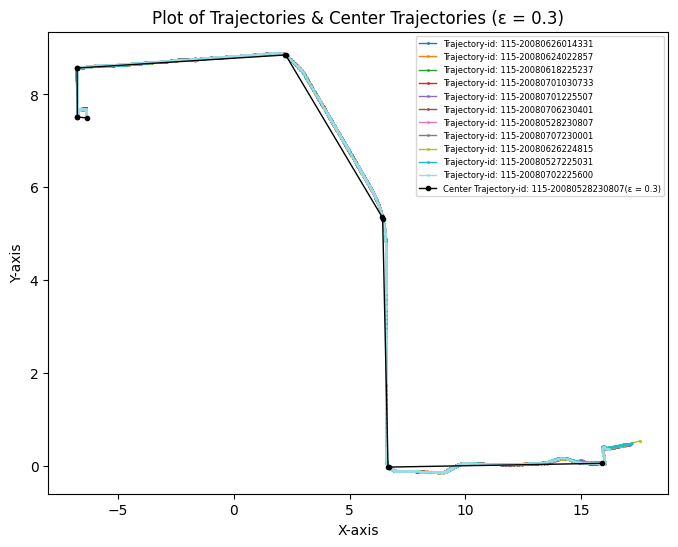

In [35]:
#e-03
cmap = cm.get_cmap('tab20', len(task4_set))
#avg_dis, approach_1, center_index = center_I(task4_set)

fig, ax = plt.subplots(figsize=(8,6))
counter = 0
for points in task4_set:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.plot(x, y, color=cmap(counter), label='Trajectory-id: ' + t_names[counter], linestyle='-', marker='o',
           markersize=1, lw = 1)
    counter = counter +1

center_points = e_03_set[center_index2]
cx = [point[0] for point in center_points]
cy = [point[1] for point in center_points]
ax.plot(cx, cy, c='black', label='Center Trajectory-id: '+ t_names[center_index2]+'(ε = 0.3)', linestyle='-', marker='o',
           markersize=3, lw = 1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories & Center Trajectories (ε = 0.3)')
ax.legend()
ax.legend(fontsize = 6)
plt.savefig('task4e03.png', dpi = 300)
plt.show()

<ipython-input-38-2318caabbc05>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(task4_set))


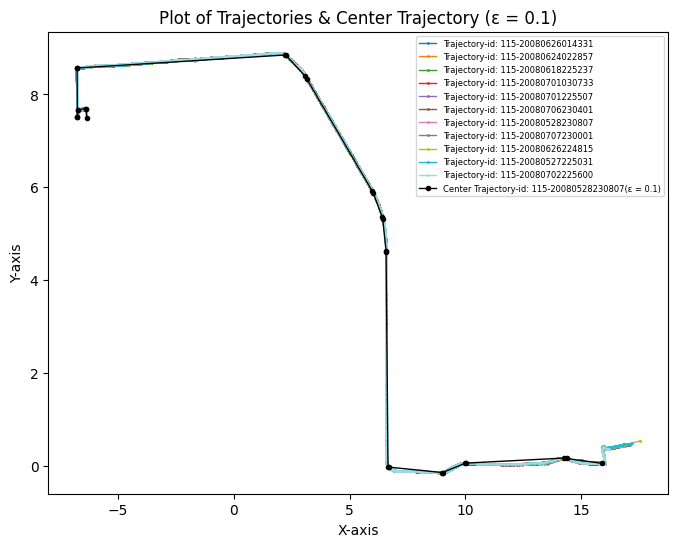

In [38]:
#e-01
cmap = cm.get_cmap('tab20', len(task4_set))

fig, ax = plt.subplots(figsize=(8,6))
counter = 0
for points in task4_set:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.plot(x, y, color=cmap(counter), label='Trajectory-id: ' + t_names[counter], linestyle='-', marker='o',
           markersize=1, lw = 1)
    counter = counter +1

center_points = e_01_set[center_index3]
cx = [point[0] for point in center_points]
cy = [point[1] for point in center_points]
ax.plot(cx, cy, c='black', label='Center Trajectory-id: '+ t_names[center_index3]+ '(ε = 0.1)', linestyle='-', marker='o',
           markersize=3, lw = 1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories & Center Trajectory (ε = 0.1)')
ax.legend(fontsize = 6)
plt.savefig('task4e01.png', dpi = 300)
plt.show()

<ipython-input-39-c70e2e27107e>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(task4_set))


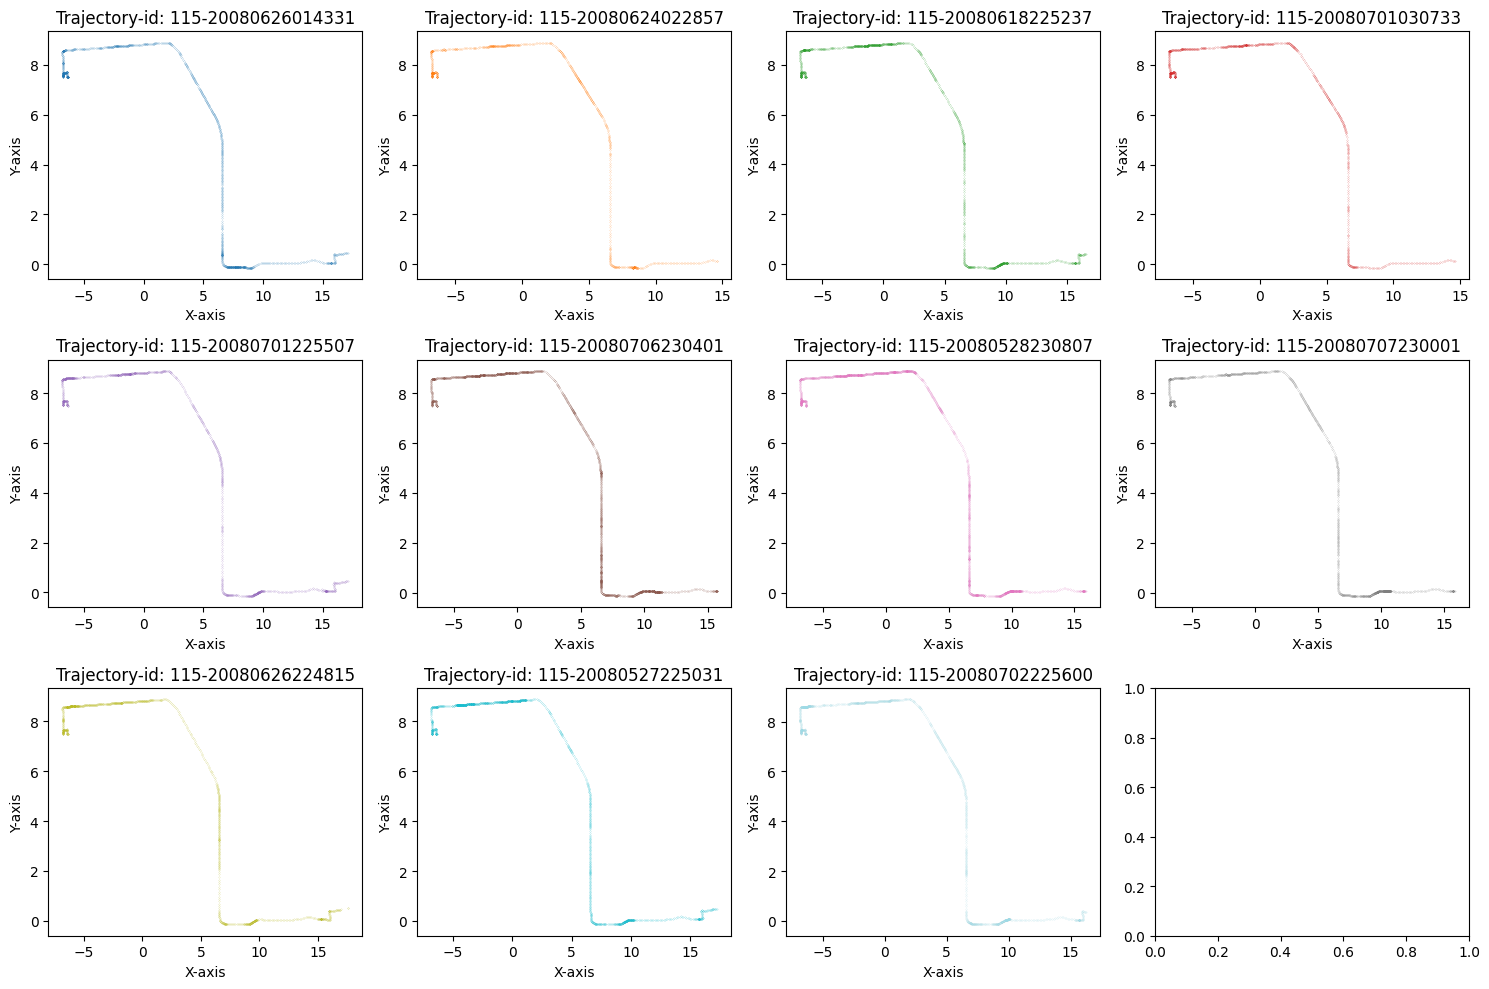

In [39]:
#Visualization of every plot in 12 subplots

# Create a colormap with enough colors for all trajectories
cmap = cm.get_cmap('tab20', len(task4_set))

# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns of subplots
axs = axs.flatten()  # Flatten the 2D array of subplots to a 1D array for easier indexing

# Iterate over trajectories and plot on subplots with different colors
for i, points in enumerate(task4_set):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax = axs[i]  # Get the current subplot
    ax.scatter(x, y, color =cmap(i), s=0.01)  
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Trajectory-id: ' + t_names[i])
    #ax.legend()

# Display the subplots
plt.tight_layout()
plt.show()

<ipython-input-41-a8299b021a1b>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(task4_set))


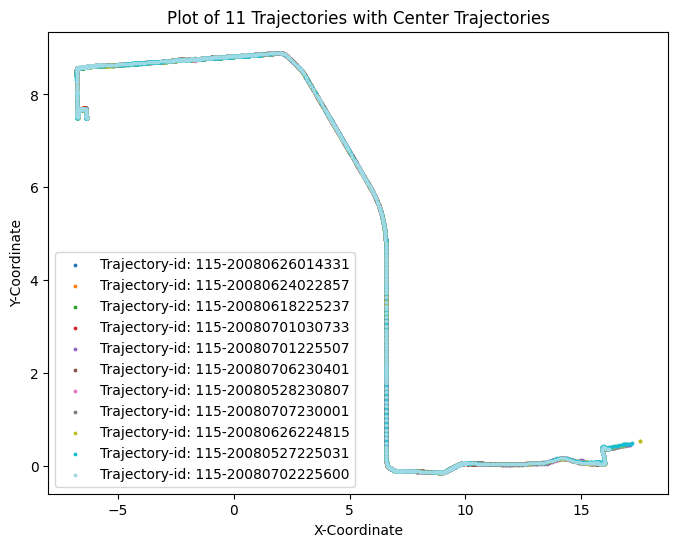

In [41]:
#Approach 1 and Approach 2 on original set
cmap = cm.get_cmap('tab20', len(task4_set))
#avg_dis, approach_1, center_index = center_I(task4_set)

fig, ax = plt.subplots(figsize=(8,6))
counter = 0
for points in preprocessed:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.scatter(x, y, color=cmap(counter), label='Trajectory-id: ' + t_names[counter], s = 3)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style
    counter = counter +1

center_points = task4_set[4]
cx = [point[0] for point in center_points]
cy = [point[1] for point in center_points]


center_2_points = center_2
x2 = [point[0] for point in center_2_points]
y2 = [point[1] for point in center_2_points]
#ax.plot(cx, cy, c='yellow', label='Center Trajectory Approach 1',linestyle='-') 
# ax.scatter(cx, cy, c='pink', label='Center Trajectory Approach 1',s = 3) 
# ax.scatter(x, y, color='black', label='Center Trajectory Approach 2', s = 0.8, zorder=1)


ax.set_xlabel('X-Coordinate')
ax.set_ylabel('Y-Coordinate')
ax.set_title('Plot of 11 Trajectories with Center Trajectories')
ax.legend()
plt.savefig('task4part2.png', dpi = 300)
plt.show()